In [77]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import random

In [78]:
def fitness(solution):
    n = len(solution)
    threats = 0
    for i in range(n):
        for j in range(i+1, n):
            if solution[i] == solution[j] or abs(solution[i] - solution[j]) == abs(i - j):
                # threat: same row or same diagonal
                threats += 1
    return n*(n-1)//2 - threats # return the number of non-threats
#here n is the number of queens and n-1 is the number of non-threats
#and we are dividing by 2 because we are counting each pair twice

In [79]:
#first generation
def initialize_population(size, n):
    population = []
    for i in range(size):
        solution = [random.randint(0, n-1) for j in range(n)] 
        population.append(solution) 
    return population

In [80]:
def genetic_algorithm(n, size=100, max_generations=1000, crossover_prob=0.8, mutation_prob=0.1):
    population = initialize_population(size, n)
    best_solution = None
    for generation in range(max_generations):
        # Evaluate fitness
        fitness_values = [fitness(solution) for solution in population]
        # Find the best solution
        best_index = fitness_values.index(max(fitness_values)) # the one with the highest fitness value
        best_solution = population[best_index]
        # Terminate if solution is found
        if fitness(best_solution) == n*(n-1)//2:
            break
        # Selection
        selection_prob = [fitness_values[i]/sum(fitness_values) for i in range(size)]
        selected = random.choices(population, weights=selection_prob, k=size)
        # Crossover
        for i in range(0, size, 2):
            if random.random() < crossover_prob:
                crossover_point = random.randint(1, n-2)
                selected[i][crossover_point:], selected[i+1][crossover_point:] = \
                    selected[i+1][crossover_point:], selected[i][crossover_point:]
        # Mutation
        for i in range(size):
            if random.random() < mutation_prob:
                mutation_point = random.randint(0, n-1)
                selected[i][mutation_point] = random.randint(0, n-1)
        # Update population
        population = selected
    return best_solution


In [81]:
def print_board(solution):
    n = len(solution)
    board = np.zeros((n,n))
    for i in range(n):
        board[i][solution[i]] = 1
    plt.imshow(board, cmap='binary')
    plt.show()

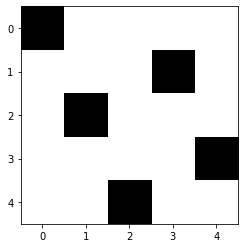

In [82]:
solution = genetic_algorithm(5)
print_board(solution)